<a href="https://colab.research.google.com/github/tariktesfa/Machine-learning-project/blob/master/Experment_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
!ls

drive  sample_data


In [25]:
## importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from sklearn import tree,linear_model,neighbors, svm
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
## importing dataset
df = pd.read_csv('/content/drive/My Drive/Prediction/Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
print("The Dataset has %d rows and %d columns" % df.shape)

The Dataset has 12316 rows and 32 columns


In [13]:
df.duplicated().sum()

0

In [14]:
### Data Cleaning
print('The dataset has total of',df.isnull().sum().sum(),'Missing Values')

The dataset has total of 20057 Missing Values


In [15]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df)

The dataset has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Defect_of_vehicle,4427,35.9
Service_year_of_vehicle,3928,31.9
Work_of_casuality,3198,26.0
Fitness_of_casuality,2635,21.4
Type_of_vehicle,950,7.7
Types_of_Junction,887,7.2
Driving_experience,829,6.7
Educational_level,741,6.0
Vehicle_driver_relation,579,4.7
Owner_of_vehicle,482,3.9


In [17]:
### Handling Categorical Missing Values
# Shows the columns with their number of catagories each variable is having
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'catagories')

Time : 1074 catagories
Day_of_week : 7 catagories
Age_band_of_driver : 5 catagories
Sex_of_driver : 3 catagories
Educational_level : 8 catagories
Vehicle_driver_relation : 5 catagories
Driving_experience : 8 catagories
Type_of_vehicle : 18 catagories
Owner_of_vehicle : 5 catagories
Service_year_of_vehicle : 7 catagories
Defect_of_vehicle : 4 catagories
Area_accident_occured : 15 catagories
Lanes_or_Medians : 8 catagories
Road_allignment : 10 catagories
Types_of_Junction : 9 catagories
Road_surface_type : 6 catagories
Road_surface_conditions : 4 catagories
Light_conditions : 4 catagories
Weather_conditions : 9 catagories
Type_of_collision : 11 catagories
Number_of_vehicles_involved : 6 catagories
Number_of_casualties : 8 catagories
Vehicle_movement : 14 catagories
Casualty_class : 4 catagories
Sex_of_casualty : 3 catagories
Age_band_of_casualty : 6 catagories
Casualty_severity : 4 catagories
Work_of_casuality : 8 catagories
Fitness_of_casuality : 6 catagories
Pedestrian_movement : 9 cat

In [18]:
### We will handle the catagorical missing value by replacing NaN values with a new catagory
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Unknown",df[variable])

In [19]:
### Select all the attributes that have missing value and replace with "Unknown" Category
for cat in ['Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured',
            'Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Type_of_collision','Vehicle_movement',
            'Work_of_casuality','Fitness_of_casuality','Pedestrian_movement']: impute_nan(df,cat)

In [20]:
print(df.isnull().sum().sum(),"Missing value: All the missing values are handled")

0 Missing value: All the missing values are handled


In [11]:
### Feature Selection
## From the total 32 features 15 features are selected by discussing with domain experts and understanding the problem domain.
data=df.copy()

In [12]:
### Dropping the remaining variables
data.drop(['Time','Day_of_week','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Road_allignment',
        'Road_surface_conditions','Number_of_vehicles_involved','Number_of_casualties','Casualty_class','Sex_of_casualty','Age_band_of_casualty',
        'Work_of_casuality','Fitness_of_casuality','Casualty_severity'], axis=1, inplace=True)

In [13]:
### The selected features are:
data.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

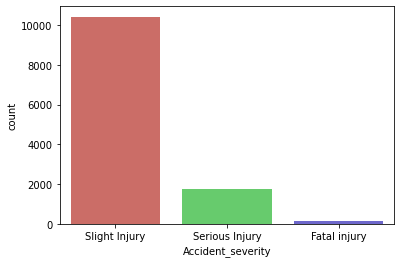

In [25]:
### Data Visualization
sns.countplot(x='Accident_severity',data=data,palette='hls')
plt.show()

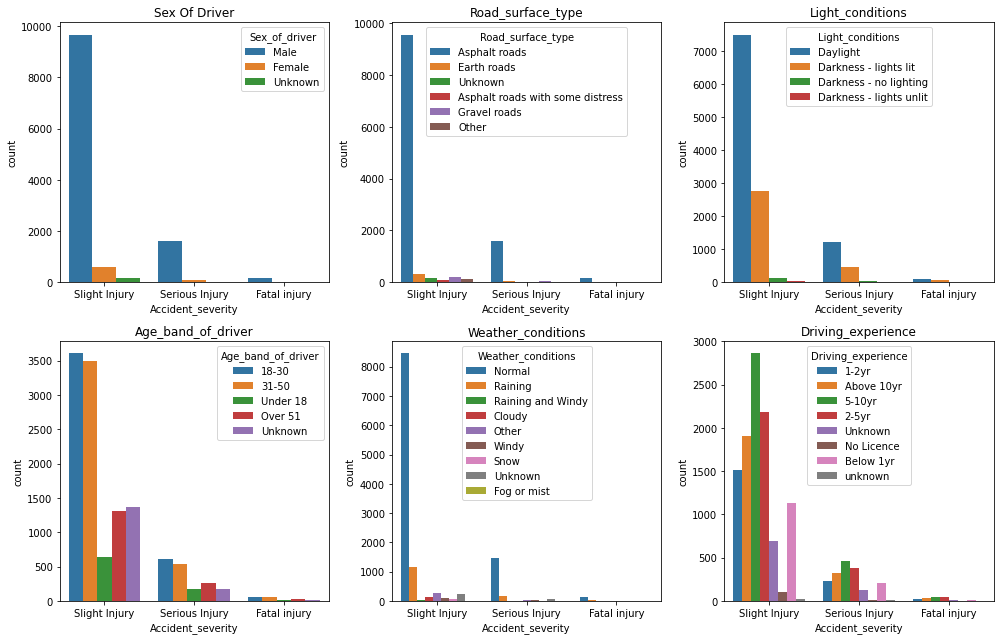

In [26]:
# Countplots to visualize how each feature affects the ouput class 

fig, axes = plt.subplots(2,3, figsize=(14,9))
axes[0,0].set_title('Sex Of Driver')
sns.countplot(x = 'Accident_severity', hue='Sex_of_driver', data = data, ax=axes[0,0])
axes[1,0].set_title('Age_band_of_driver')
sns.countplot(x = 'Accident_severity', hue='Age_band_of_driver', data = data, ax=axes[1,0])
axes[0,1].set_title('Road_surface_type')
sns.countplot(x = 'Accident_severity', hue='Road_surface_type', data = data, ax=axes[0,1])
axes[1,1].set_title('Weather_conditions')
sns.countplot(x = 'Accident_severity', hue='Weather_conditions', data = data, ax=axes[1,1])
axes[0,2].set_title('Light_conditions')
sns.countplot(x = 'Accident_severity', hue='Light_conditions', data = data, ax=axes[0,2])
axes[1,2].set_title('Driving_experience')
sns.countplot(x = 'Accident_severity', hue='Driving_experience', data = data, ax=axes[1,2])

plt.tight_layout()

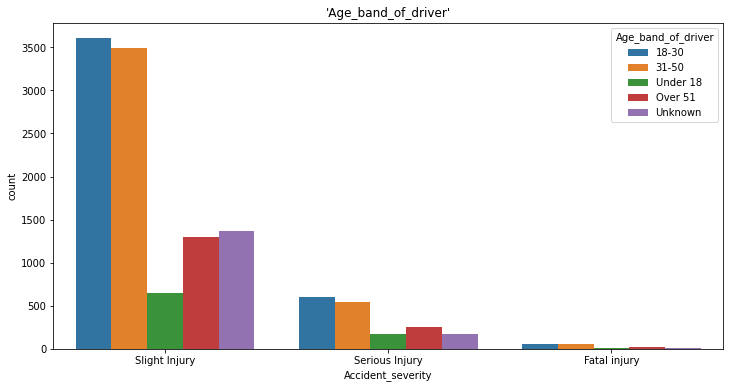

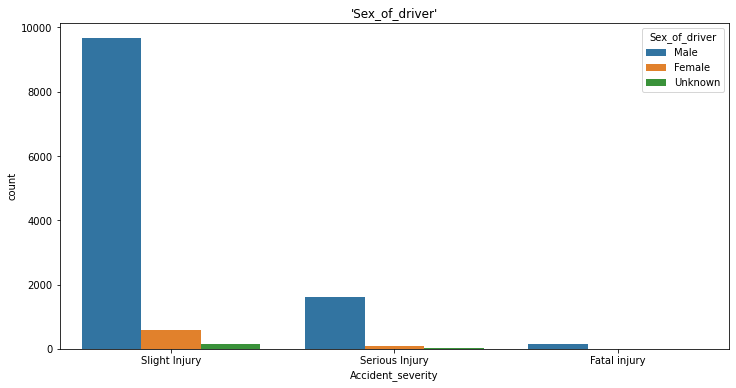

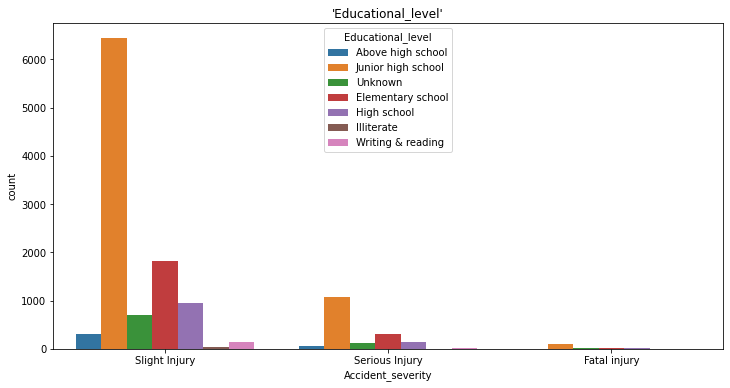

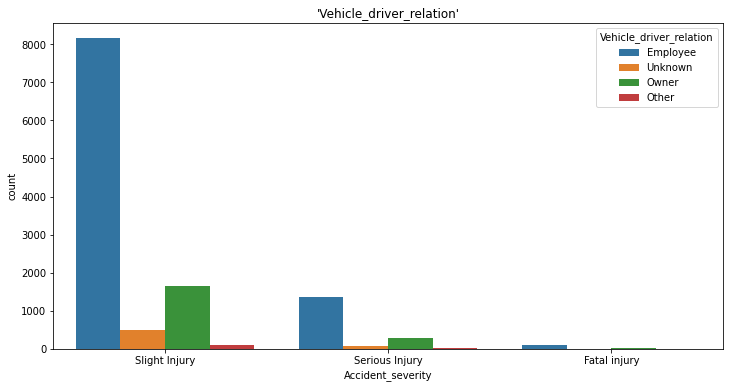

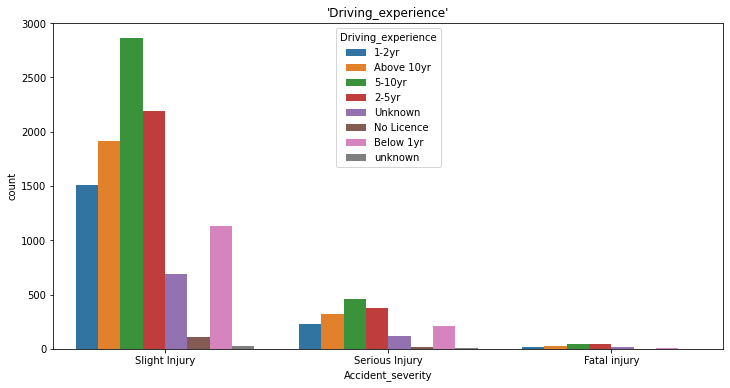

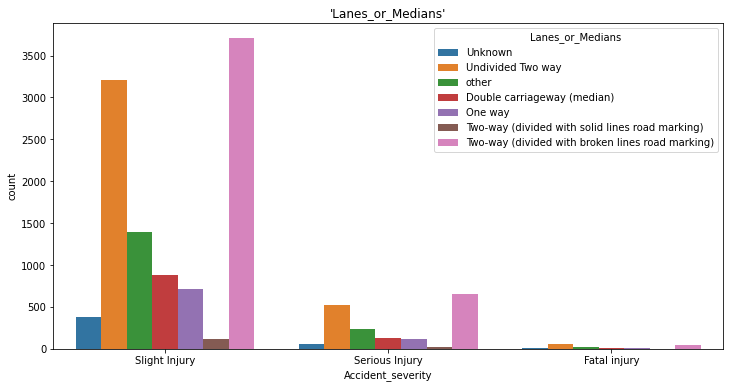

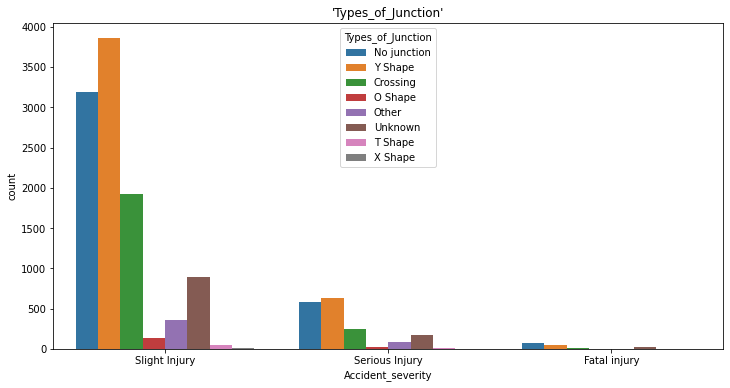

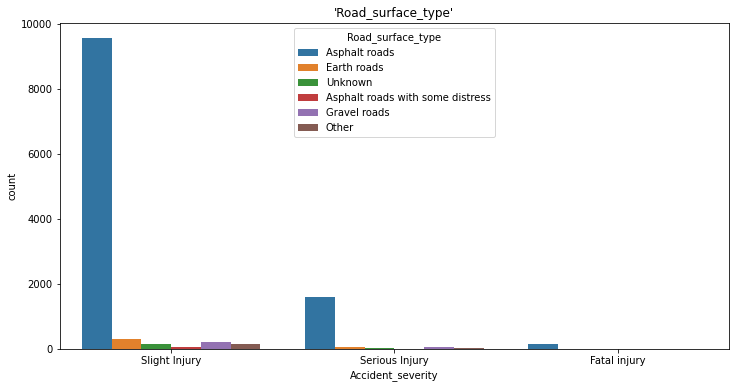

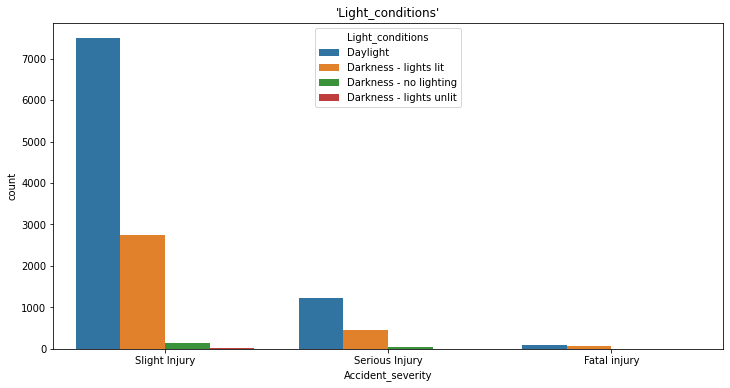

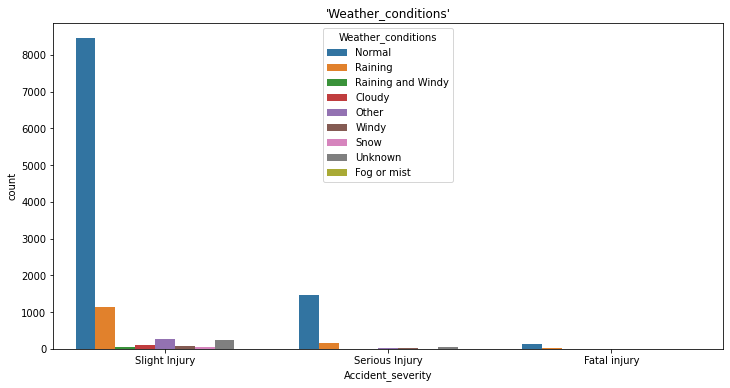

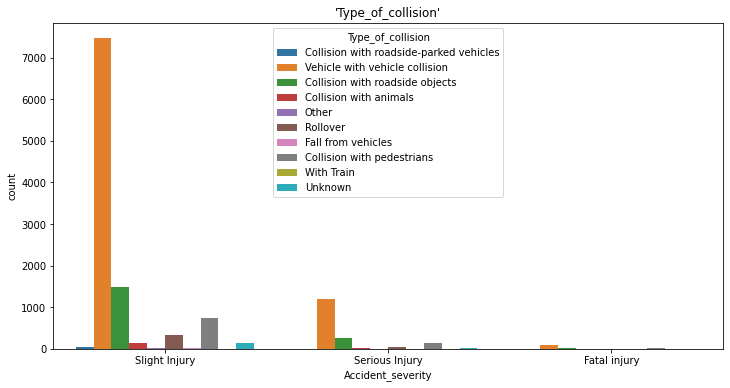

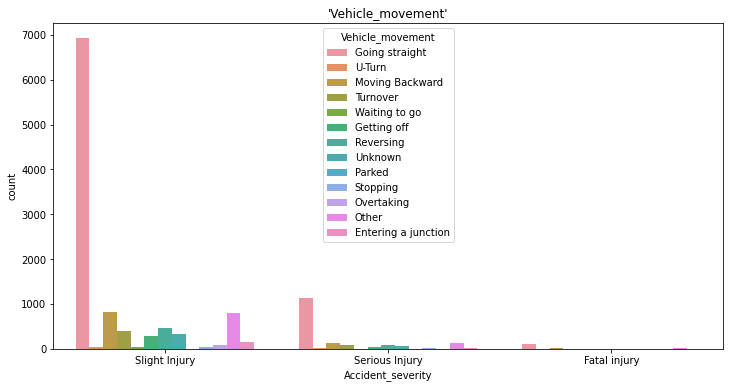

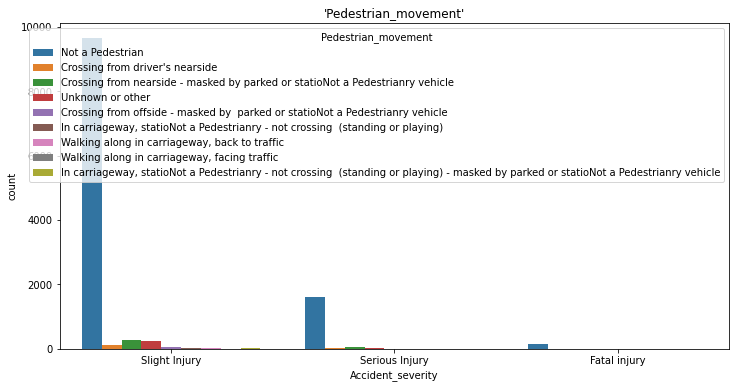

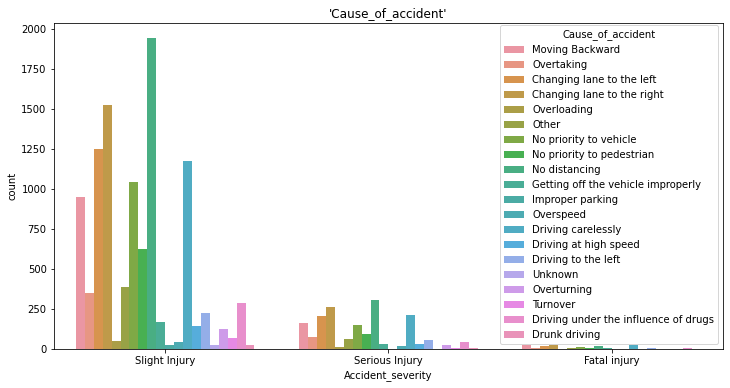

In [27]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("'%s'"%i)
    sns.countplot(data['Accident_severity'],hue=data[i])

In [14]:
### Separating Independent and Dependent features
X = data.iloc[:,:-1]
y = data.iloc[:, 14]

In [29]:
### Data Transformation
#### Handling Categorical Variables - Creating Dummy Variables
# Shows the columns with their number of categories each variable is having
for col in data.columns:
    print(col, ':', len(data[col].unique()), 'categories')

Age_band_of_driver : 5 categories
Sex_of_driver : 3 categories
Educational_level : 7 categories
Vehicle_driver_relation : 4 categories
Driving_experience : 8 categories
Lanes_or_Medians : 7 categories
Types_of_Junction : 8 categories
Road_surface_type : 6 categories
Light_conditions : 4 categories
Weather_conditions : 9 categories
Type_of_collision : 10 categories
Vehicle_movement : 13 categories
Pedestrian_movement : 9 categories
Cause_of_accident : 20 categories
Accident_severity : 3 categories


In [15]:
data['Accident_severity'].replace(('Slight Injury', 'Serious Injury', 'Fatal injury'), (0,1,2), inplace = True)

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [20]:
X.shape

(12316, 97)

In [21]:
### Handling Class imbalance
### Checking for data imbalance 
y.value_counts()

0    10415
1     1743
2      158
Name: Accident_severity, dtype: int64

In [22]:
y = y.astype('int')

In [23]:
print('Slight Injury: ' + str(round(data['Accident_severity'].value_counts()[0] / len(data) * 100, 2)) + '%\nSerious Injury: ' + 
      str(round(data['Accident_severity'].value_counts()[1] / len(data) * 100, 2)) + '%\nFatal Injury: ' + 
      str(round(data['Accident_severity'].value_counts()[2] / len(data) * 100, 2))+ '%')

Slight Injury: 84.56%
Serious Injury: 14.15%
Fatal Injury: 1.28%


In [26]:
# Undersampling 
rus = RandomUnderSampler(random_state=0)
X_under, y_under = rus.fit_sample(X, y)
undersampled = pd.DataFrame(X_under, columns=X.columns)
undersampled['Accident_severity'] = y_under
##undersampled.to_csv('Data/undersampled.csv', index=False)

X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(X,y,test_size=0.2,random_state=5)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train_under, y_train_under, test_size = 0.2, random_state = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Print class frequencies 
pd.Series(y_under).value_counts()

2    158
1    158
0    158
dtype: int64

In [30]:
# Oversampling
sm = SMOTE(random_state=0)
X_over, y_over = sm.fit_sample(X, y)
oversampled = pd.DataFrame(X_over, columns=X.columns)
oversampled['Accident_severity'] = y_over
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X,y,test_size=0.2,random_state=5)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train_smote, y_train_smote, test_size = 0.2, random_state = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# Print class frequencies 
pd.Series(y_over).value_counts()

2    10415
1    10415
0    10415
dtype: int64

Splitting the dataset into training and test data for normal distribution without using any imbalance handling techniques


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)

### Model Training
we have left the algorithms parameters as default. First, we train with all the algorithms to use as a benchmark. 
As such, we won't be doing any hyperparameter tunning just yet. Its performance will be used as a baseline that we 
will work on to improve.

1.   Logistic Regression



In [34]:
model = linear_model.LogisticRegression(multi_class='auto')
# feeding the training data into the model
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# use the model to make predictions with the test data
from sklearn import metrics
y_pred = model.predict(X_test)
# how did our model perform?
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.8452090946000812
Testing Accuracy:  0.8474025974025974

Confusion Matrix: - 
 [[2088    0    0]
 [ 349    0    0]
 [  27    0    0]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2088
           1       0.00      0.00      0.00       349
           2       0.00      0.00      0.00        27

    accuracy                           0.85      2464
   macro avg       0.28      0.33      0.31      2464
weighted avg       0.72      0.85      0.78      2464



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ### 2. Naive Bayesian


In [37]:
model = GaussianNB()
# feeding the training data into the model
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
# predicting the values for x-test
y_pred = model.predict(X_test)
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.06354039788875356
Testing Accuracy:  0.06493506493506493

Confusion Matrix: - 
 [[  92  303 1693]
 [   8   44  297]
 [   0    3   24]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.92      0.04      0.08      2088
           1       0.13      0.13      0.13       349
           2       0.01      0.89      0.02        27

    accuracy                           0.06      2464
   macro avg       0.35      0.35      0.08      2464
weighted avg       0.80      0.06      0.09      2464



### 3. Decision Tree


In [39]:
model = tree.DecisionTreeClassifier()
# feeding the training data into the model
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
# predicting the values for x-test
y_pred = model.predict(X_test)
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()

print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.989646772228989
Testing Accuracy:  0.7248376623376623

Confusion Matrix: - 
 [[1734  329   25]
 [ 292   50    7]
 [  20    5    2]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2088
           1       0.13      0.14      0.14       349
           2       0.06      0.07      0.07        27

    accuracy                           0.72      2464
   macro avg       0.35      0.35      0.35      2464
weighted avg       0.74      0.72      0.73      2464



### 4. K Nearest Neighbors

In [41]:
model = neighbors.KNeighborsClassifier()
# feeding the training data into the model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
# predicting the values for x-test
y_pred = model.predict(X_test)
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.8519082419813236
Testing Accuracy:  0.8356331168831169

Confusion Matrix: - 
 [[2050   37    1]
 [ 340    9    0]
 [  26    1    0]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2088
           1       0.19      0.03      0.05       349
           2       0.00      0.00      0.00        27

    accuracy                           0.84      2464
   macro avg       0.35      0.34      0.32      2464
weighted avg       0.75      0.84      0.78      2464



### 5. Support Vector Machine 

In [43]:
model = svm.SVC()
# feeding the training data into the model
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
# predicting the values for x-test
y_pred = model.predict(X_test)
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.8452090946000812
Testing Accuracy:  0.8474025974025974

Confusion Matrix: - 
 [[2088    0    0]
 [ 349    0    0]
 [  27    0    0]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2088
           1       0.00      0.00      0.00       349
           2       0.00      0.00      0.00        27

    accuracy                           0.85      2464
   macro avg       0.28      0.33      0.31      2464
weighted avg       0.72      0.85      0.78      2464



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. AdaBoost

In [45]:
model =  AdaBoostClassifier()
# feeding the training data into the model
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [46]:
# predicting the values for x-test
y_pred = model.predict(X_test)
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.8452090946000812
Testing Accuracy:  0.8474025974025974

Confusion Matrix: - 
 [[2088    0    0]
 [ 349    0    0]
 [  27    0    0]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2088
           1       0.00      0.00      0.00       349
           2       0.00      0.00      0.00        27

    accuracy                           0.85      2464
   macro avg       0.28      0.33      0.31      2464
weighted avg       0.72      0.85      0.78      2464



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7. Random Forest

In [47]:
model = RandomForestClassifier()
# feeding the training data into the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# predicting the values for x-test
y_pred = model.predict(X_test)
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))
print()
print("Confusion Matrix: - \n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test, y_pred))

Training Accuracy:  0.989646772228989
Testing Accuracy:  0.8352272727272727

Confusion Matrix: - 
 [[2056   31    1]
 [ 347    2    0]
 [  27    0    0]]

Classification Report: - 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2088
           1       0.06      0.01      0.01       349
           2       0.00      0.00      0.00        27

    accuracy                           0.84      2464
   macro avg       0.30      0.33      0.31      2464
weighted avg       0.73      0.84      0.77      2464

